<a href="https://colab.research.google.com/github/PraveenPrabhat125/Python-for-Data-Analyst/blob/main/Python_for_data_analyst_Diwali_sales_analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modules import

In [2]:
import numpy as np # 1d array
import pandas as pd # working with tables/df
import matplotlib.pyplot as plt # visulizzation
%matplotlib inline
import seaborn as sns

# Import data

In [9]:
df = pd.read_csv(r'/content/Diwali Sales Data.csv', encoding = 'unicode_escape')

In [10]:
df.shape

(11251, 15)

In [11]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Observation:
Total rows: RangeIndex: 11251 entries, 0 to 11250
-- So check if all coumns have this much of value if not then it contain null, and you need to remove it

# Drop
Drops columns or row

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [ ]:
# lets drop this columns
df.drop(['Status', 'unnamed1'], axis = 1) # to inplace change: we need to use inplace to save the changes

df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

# Drop:
Note:
1. Axis = 1 Columns, axis = 0 is row
2. inplace = True : to save the changes

# Null values
1. isnull(): Wil provide us true and false value
2. isnull(Df).sum() : count of null value

In [23]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

## Observation:
Amount column have 12 null values

In [25]:
df.shape

(11251, 13)

In [34]:
df[df['Amount'].isnull()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [45]:
row_drop = df[df['User_ID'] == 1002092].index

print(row_drop)

# lets drop this data
df = df.drop(row_drop)

Index([7, 1485, 2589, 2997, 4033, 5332, 7273, 8079, 8104, 8458, 9899, 10992], dtype='int64')


In [46]:
df.shape

(11239, 13)

## Obseravation:
1. we need to get the index of row to drop with .index
2. 12 row were having null so the df.shape row count get reduced by 12

In [49]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              11
dtype: int64

In [52]:
print(df.shape)

df.dropna(inplace = True)
print(df.shape)

(11239, 13)
(11228, 13)


In [54]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

## change of any data type

In [55]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11228 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11228 non-null  int64  
 1   Cust_name         11228 non-null  object 
 2   Product_ID        11228 non-null  object 
 3   Gender            11228 non-null  object 
 4   Age Group         11228 non-null  object 
 5   Age               11228 non-null  int64  
 6   Marital_Status    11228 non-null  int64  
 7   State             11228 non-null  object 
 8   Zone              11228 non-null  object 
 9   Occupation        11228 non-null  object 
 10  Product_Category  11228 non-null  object 
 11  Orders            11228 non-null  int64  
 12  Amount            11228 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [67]:
# lets convert this amount[float data type to integer]
print(df['Amount'].dtype)

# total amount
print(df['Amount'].sum())

# change float to int
df['Amount'] = df['Amount'].astype('int')

print('\nAfter dtype cahnge')
# lets convert this amount[float data type to integer]
print(df['Amount'].dtype)

# total amount
print(df['Amount'].sum())

int64
106159260

After dtype cahnge
int64
106159260


## Rename of columns name

In [68]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.122800e+04,11228.000000,11228.000000,11228.000000,11228.000000
mean,1.003004e+06,35.369166,0.420021,2.490114,9454.868187
std,1.716642e+03,12.688429,0.493584,1.115009,5223.104542
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001491e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003067e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004429e+06,43.000000,1.000000,3.000000,12677.250000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## Observation:
Only 4 columns have numberical values in df

In [71]:
df1 = df.rename(columns = {'Marital_Status': 'M_status'})

# or use inplace = True
df1.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'M_status', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

In [78]:
# use describe on specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11228.000000,11228.000000,11228.000000
mean,35.369166,2.490114,9454.868187
std,12.688429,1.115009,5223.104542
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12677.250000
max,92.000000,4.000000,23952.000000


# Group by
1. df.groupby('Gender').count() : This will work on all columns
2. if you want similar to this then : use aggrigate function of spectific columns
select gender , sum(amount), count(cusomter)
from table
group by gender

In [91]:
# print(df['Gender'])

# group by
# print(df.groupby('Gender').count())

result = df.groupby('Gender').agg({
    'Amount': 'sum',
    'User_ID': 'count',
    'Age': 'sum'
})
print("Aggrigate funtion:\n", result)


Aggrigate funtion:
           Amount  User_ID     Age
Gender                           
F       74288958     7825  276119
M       31870302     3403  121006


# EDA : Exploratory Data Analysis

## Gender

In [92]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

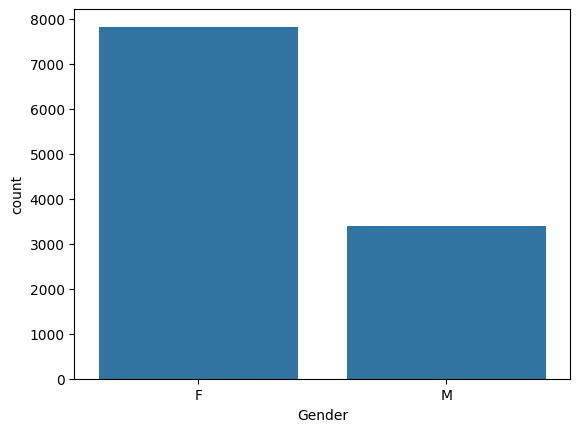

In [93]:
sns.countplot(x = 'Gender', data = df) # value are not showing

In the provided code, ax.containers is used to access the bars of the bar plot created by sns.countplot. The for loop iterates over each container (which represents a group of bars), and then the ax.bar_label(bars) method adds labels to each bar in the container.

1. sns.countplot creates a bar plot showing the count of observations in each categorical bin using bars.

2. x='Gender' specifies that the counts are based on the Gender column of the DataFrame df.
3. The plot object is stored in the variable ax.

4. ax.containers is a list of bar containers. Each container contains all the bars for one categorical level of the x or y variable. In this case, there are containers for each gender.

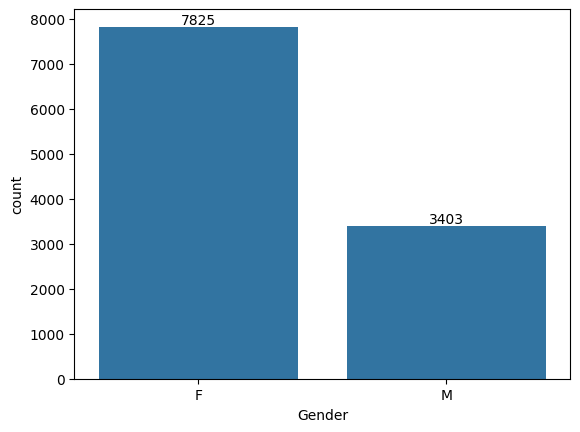

In [101]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
  ax.bar_label(bars)


In [116]:
amount_sum = df.groupby('Gender').agg({
    'Amount': 'sum'
}
)
amount_sum


# sns.barplot(x = amount_sum['Gender'], y = amount_sum['Amount'])

,Amount
Gender,
F,74288958
M,31870302


In [117]:
df.groupby(['Gender'], as_index = False)['Amount'].sum()

,Gender,Amount
0,F,74288958
1,M,31870302


In [123]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

In [124]:
sales_gen

,Gender,Amount
0,F,74288958
1,M,31870302


<Axes: xlabel='Gender', ylabel='Amount'>

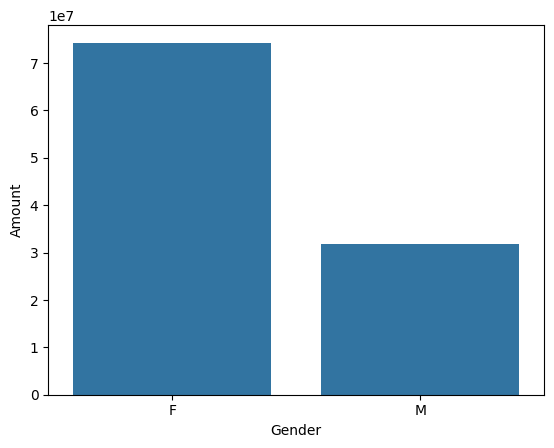

In [125]:
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

## insight
- Most of buyer are female, also purchasing power of female is greater then men

In [128]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Age

<Axes: xlabel='Age Group', ylabel='count'>

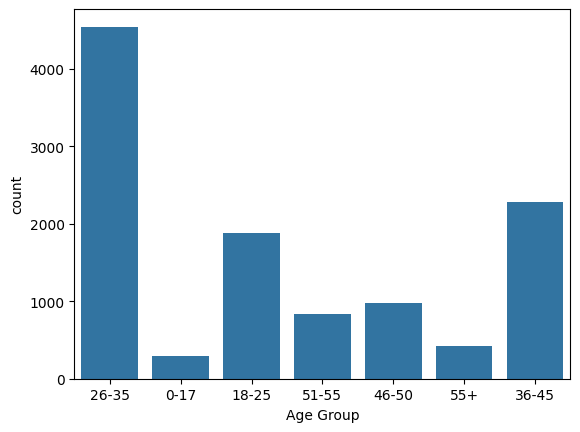

In [130]:
sns.countplot(data = df, x = 'Age Group')

<Axes: xlabel='Age Group', ylabel='count'>

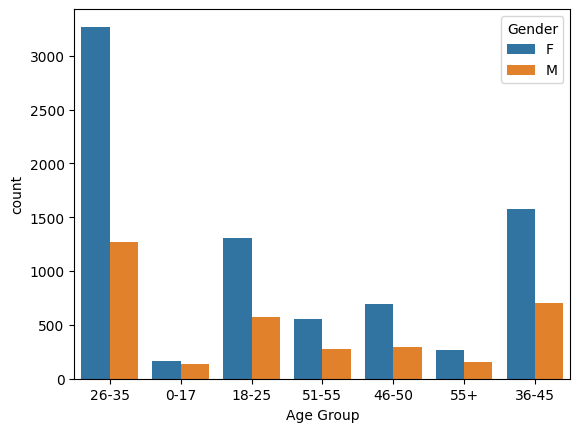

In [131]:
sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

<Axes: xlabel='Age Group', ylabel='count'>

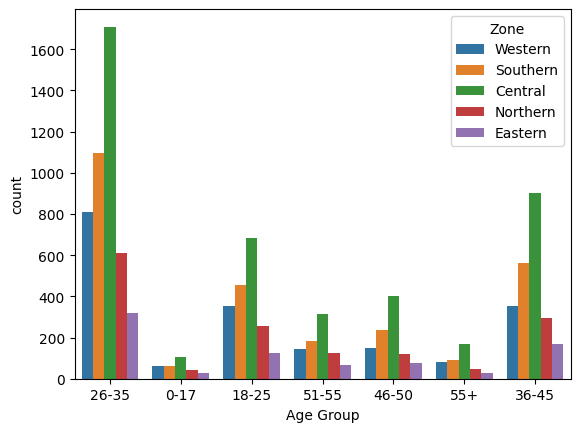

In [132]:
sns.countplot(data = df, x = 'Age Group', hue = 'Zone')

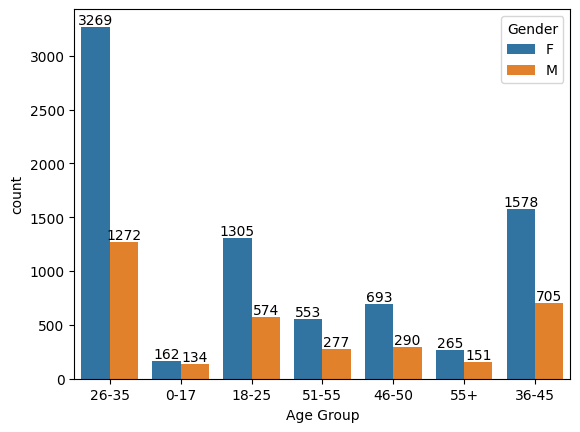

In [134]:

ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
ax

# Lets add label
for bars in ax.containers:
  ax.bar_label(bars)

In [135]:
df.groupby(['Age Group'], as_index = False)['Amount'].sum().

,Age Group,Amount
0,0-17,2699653
1,18-25,17240732
2,26-35,42613442
3,36-45,22144994
4,46-50,9207844
5,51-55,8261477
6,55+,3991118


In [138]:
age_groupby_amt = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False )
age_groupby_amt

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,3991118
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

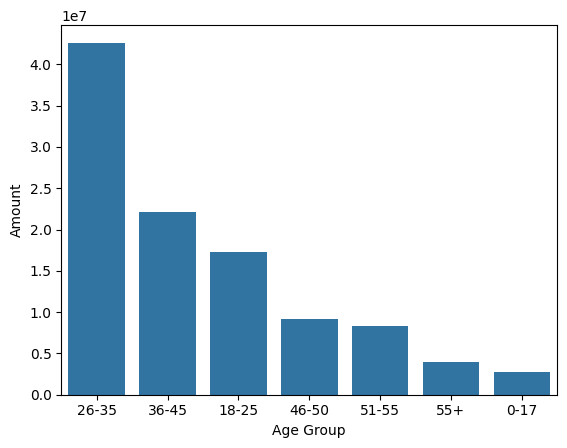

In [141]:
sns.barplot(x = 'Age Group', y = 'Amount', data = age_groupby_amt)

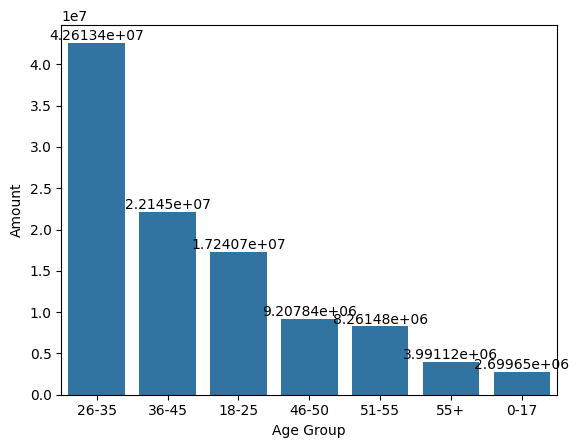

In [143]:
ax = sns.barplot(x = 'Age Group', y = 'Amount', data = age_groupby_amt)

for bars in ax.containers:
  ax.bar_label(bars)


# for bars in ax.containers:
#   ax.bar_label(bars)

# Insight
most of buyers are females of 26-35 age group

In [144]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# States

In [155]:
sales_sate = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending= False)
sales_sate[:10] # top 10

,State,Orders
14,Uttar Pradesh,4801
10,Maharashtra,3809
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2250
0,Andhra Pradesh,2049
5,Himachal Pradesh,1566
8,Kerala,1131
4,Haryana,1109
3,Gujarat,1066


<Axes: xlabel='State', ylabel='Orders'>

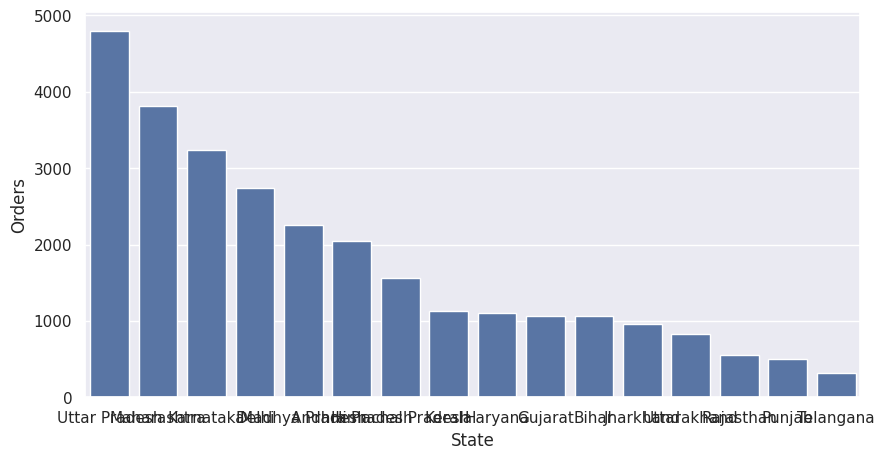

In [161]:
sales_states = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)
sns.set(rc={'figure.figsize': (10,5)}) # we are getting the name as overlap so we have to adjust the size of figure

sns.barplot(data  = sales_states, x = 'State', y = 'Orders')

<Axes: xlabel='State', ylabel='Orders'>

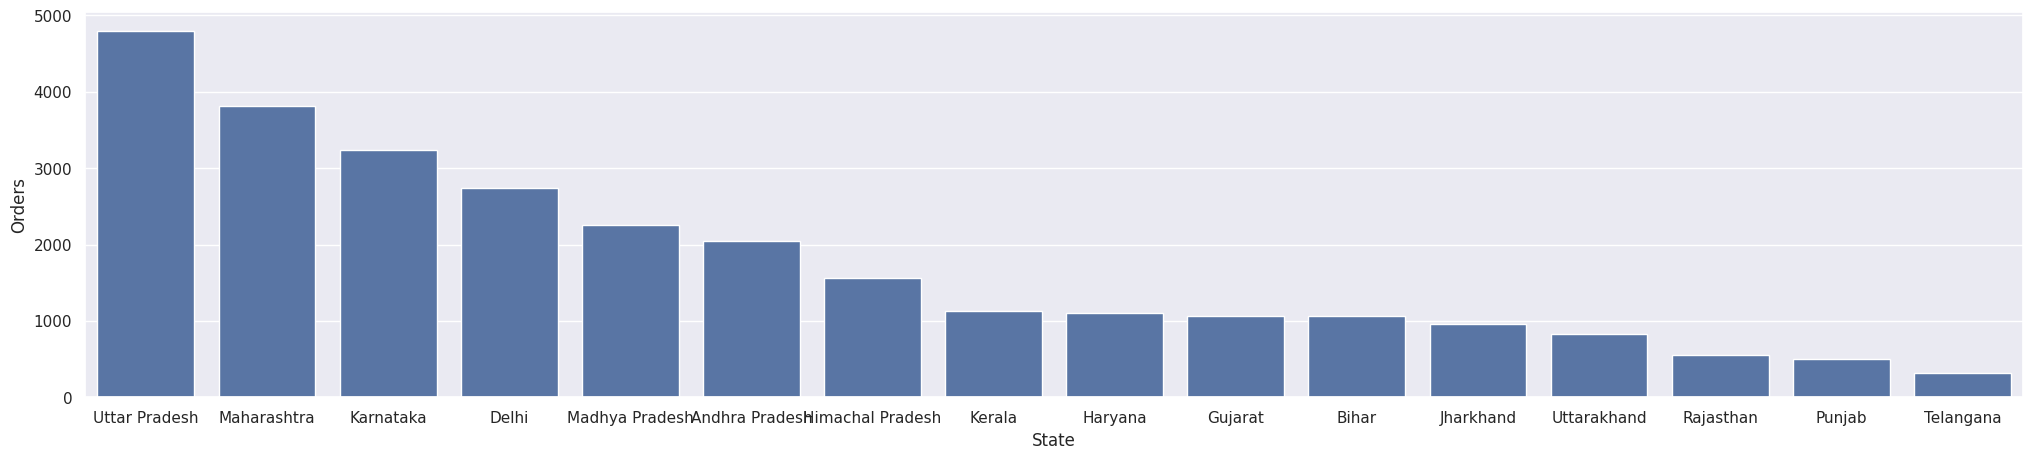

In [164]:
sns.set(rc={'figure.figsize': (25,5)}) # we are getting the name as overlap so we have to adjust the size of figure

sns.barplot(data  = sales_states, x = 'State', y = 'Orders')

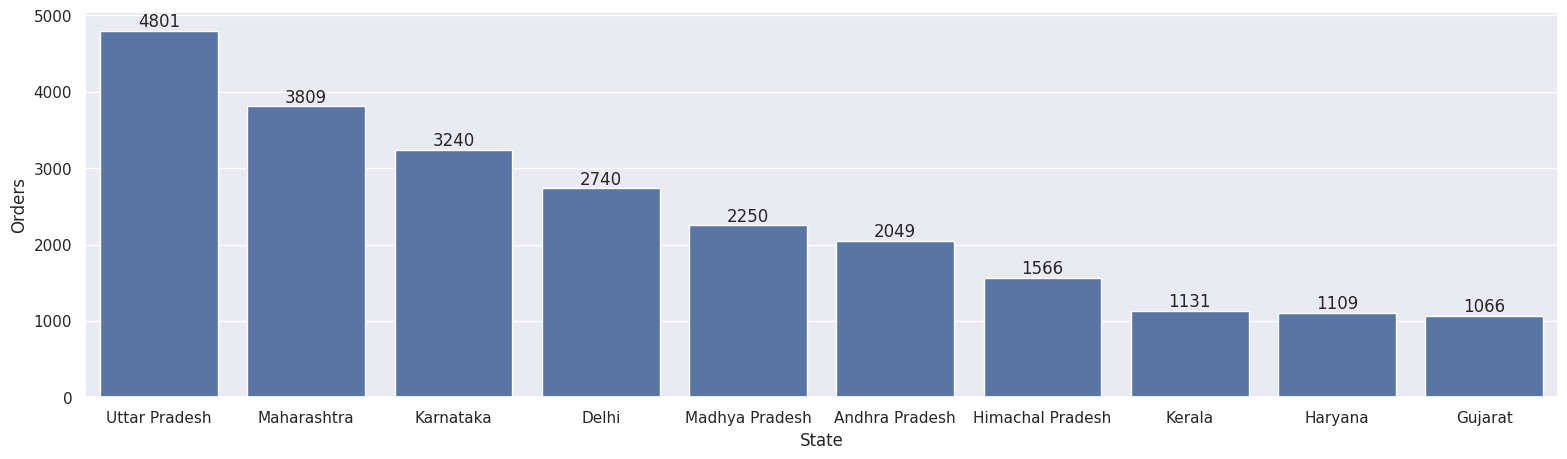

In [169]:
sns.set(rc={'figure.figsize': (19,5)}) # we are getting the name as overlap so we have to adjust the size of figure

sales_states1 = sales_states[:10]
ax =sns.barplot(data  = sales_states1, x = 'State', y = 'Orders')

for bars in ax.containers:
  ax.bar_label(bars)

<ipython-input-170-9101ebd01489>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.barplot(data  = sales_states1, x = 'State', y = 'Orders',  palette = 'viridis')


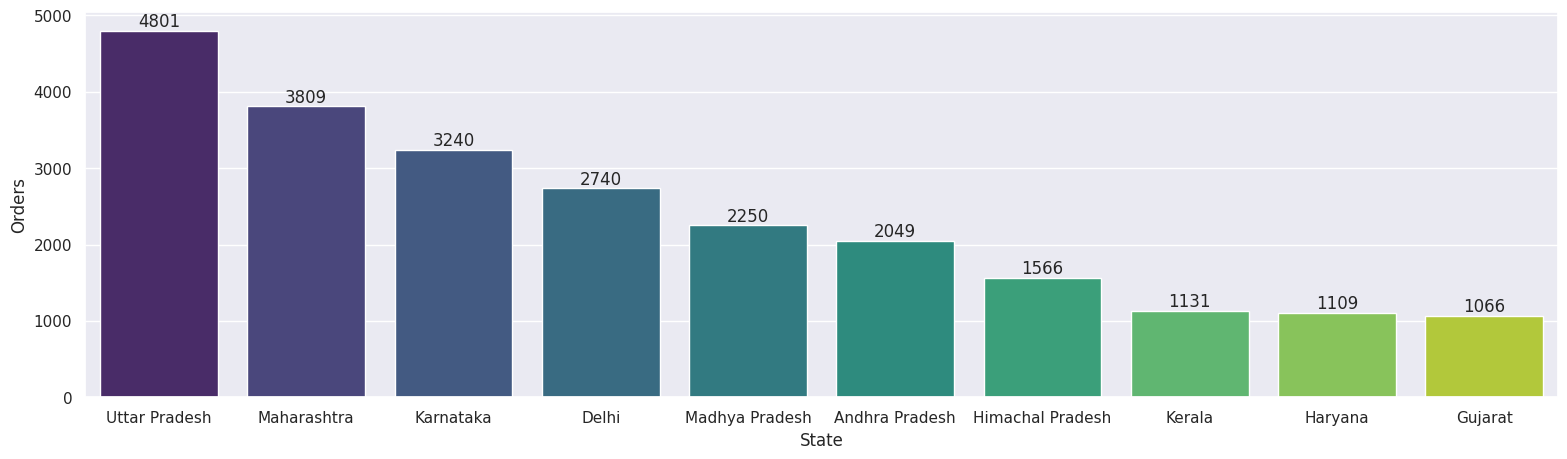

In [170]:
sns.set(rc={'figure.figsize': (19,5)}) # we are getting the name as overlap so we have to adjust the size of figure

sales_states1 = sales_states[:10]
ax =sns.barplot(data  = sales_states1, x = 'State', y = 'Orders',  palette = 'viridis')

for bars in ax.containers:
  ax.bar_label(bars)

## to get the different colors use palette
Here are some additional palette options you can explore:

'pastel'
'deep'
'muted'
'bright'
'dark'
'colorblind'

<ipython-input-172-07397041d945>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.barplot(data  = sales_states1, x = 'State', y = 'Orders',  palette = 'bright')


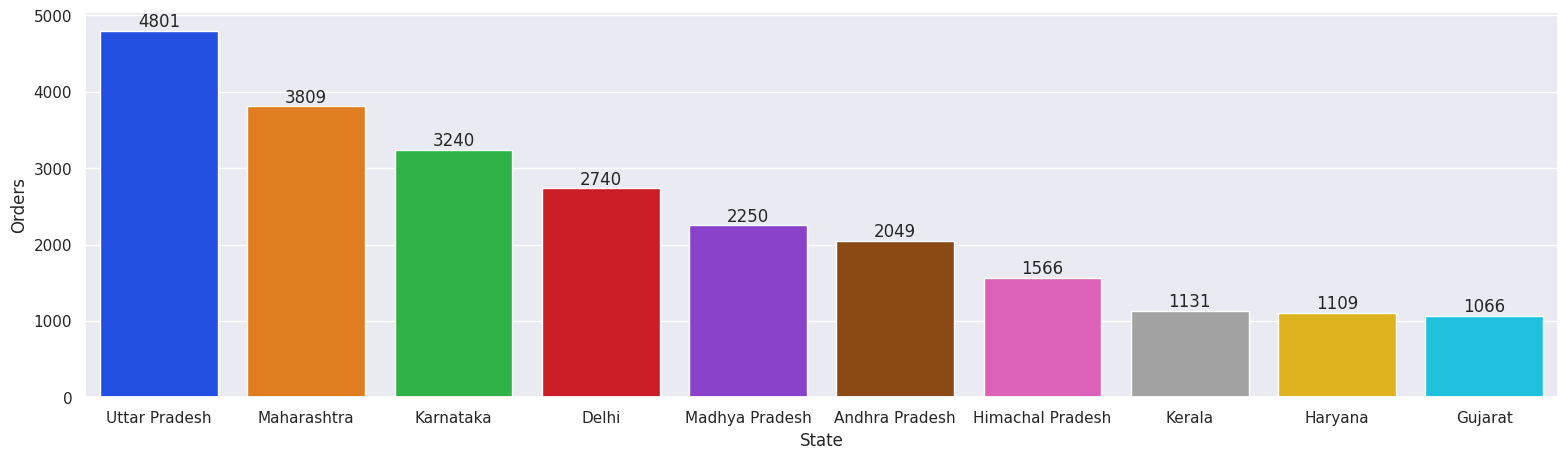

In [172]:
sns.set(rc={'figure.figsize': (19,5)}) # we are getting the name as overlap so we have to adjust the size of figure

sales_states1 = sales_states[:10]
ax =sns.barplot(data  = sales_states1, x = 'State', y = 'Orders',  palette = 'bright')

for bars in ax.containers:
  ax.bar_label(bars)

In [180]:
# States vs amount
grouped_df = df.groupby(['State'], as_index=False).agg({
    'Amount': 'sum',
    'Orders': 'sum'
})

grouped_df[:10]

,State,Amount,Orders
0,Andhra Pradesh,8025727,2049
1,Bihar,4006493,1059
2,Delhi,11603818,2740
3,Gujarat,3946082,1066
4,Haryana,4220175,1109
5,Himachal Pradesh,4959734,1566
6,Jharkhand,3026456,953
7,Karnataka,13523540,3240
8,Kerala,3877402,1131
9,Madhya Pradesh,8095171,2250


<Axes: xlabel='State', ylabel='Amount'>

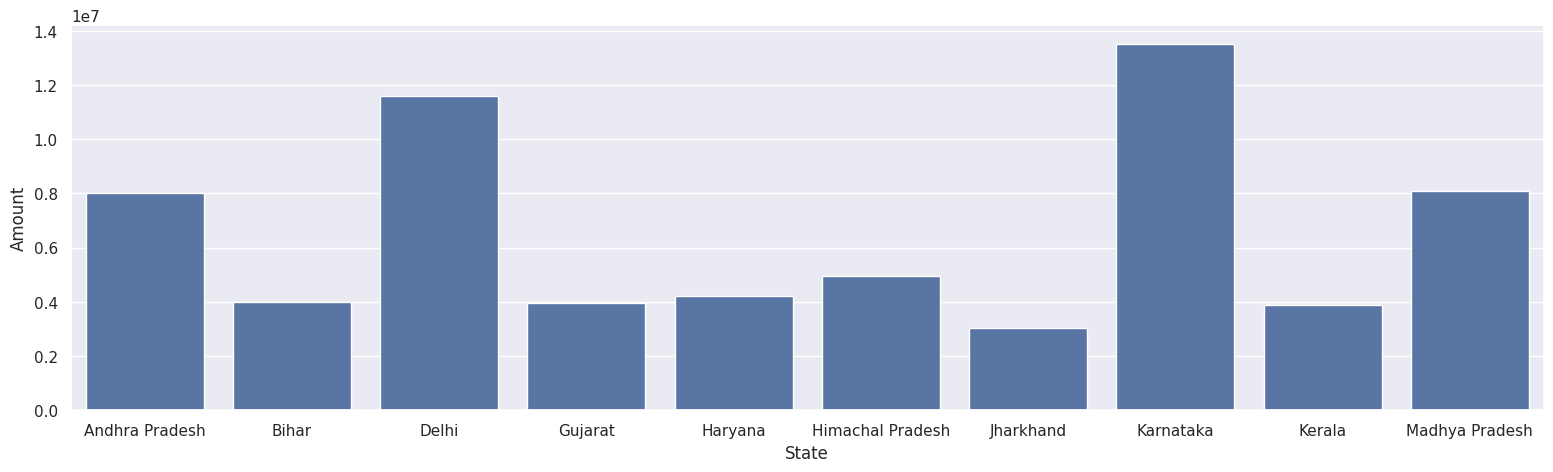

In [182]:
sns.barplot(data = grouped_df[:10], x = 'State', y = 'Amount')

<ipython-input-191-7c9a4710ae89>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = grouped_df1[:10], x = 'State', y = 'Amount', palette = 'bright')


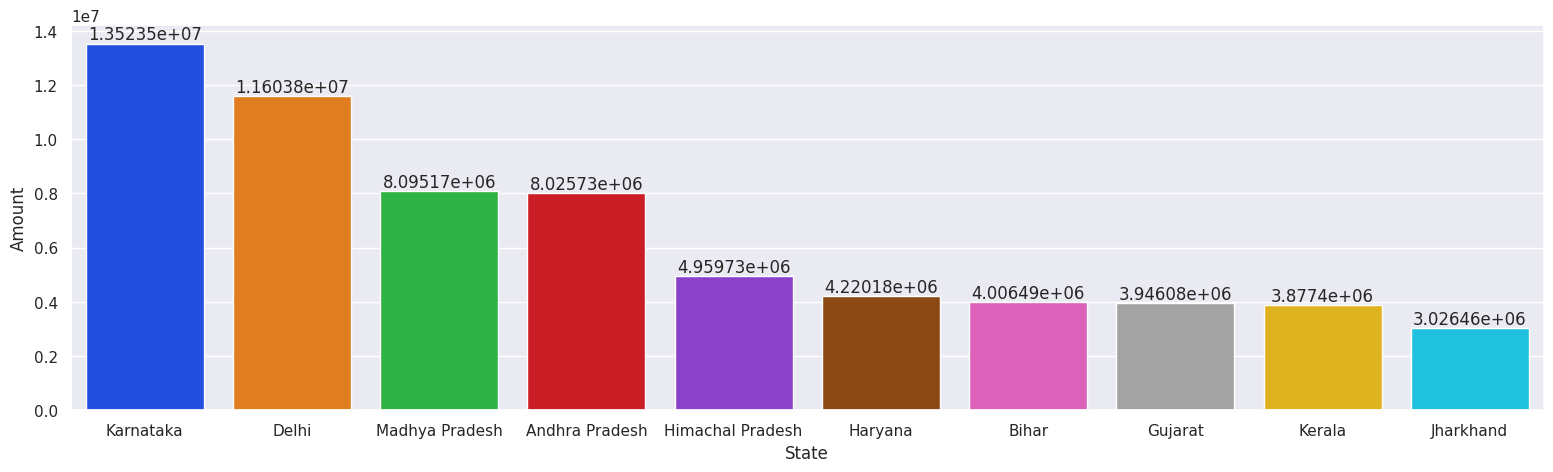

In [191]:
# the above graph need to be sorted
grouped_df1 = grouped_df[:10].sort_values(by = 'Amount', ascending = False)

ax = sns.barplot(data = grouped_df1[:10], x = 'State', y = 'Amount', palette = 'bright')

sns.set(rc={'figure.figsize': (19, 5)})

for bars in ax.containers:
  ax.bar_label(bars)

  # for bars in ax.containers:
  # ax.bar_label(bars)

# Marital status
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<ipython-input-193-e223e6f422cd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Marital_Status', palette = 'bright')


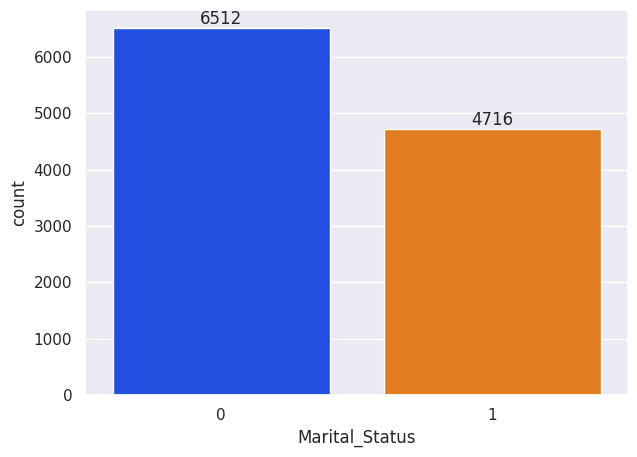

In [193]:
ax = sns.countplot(data = df, x = 'Marital_Status', palette = 'bright')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

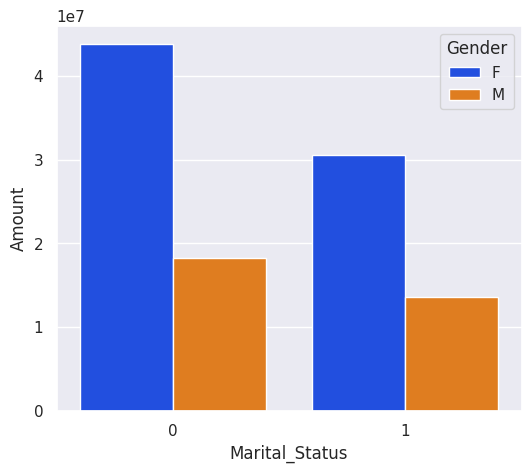

In [195]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender', palette = 'bright')

# Occupation

<ipython-input-197-3f43d5635ae3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Occupation', palette = 'bright')


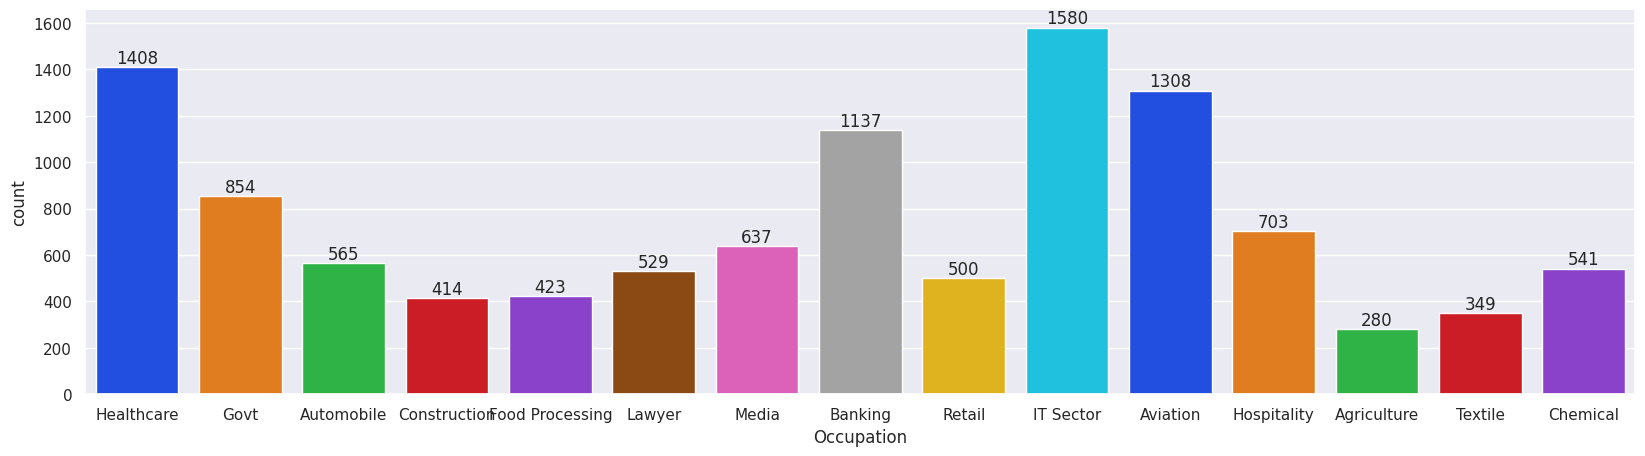

In [197]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation', palette = 'bright')

for bars in ax.containers:
    ax.bar_label(bars)

<ipython-input-198-681e65b59a6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount', palette = 'bright')


<Axes: xlabel='Occupation', ylabel='Amount'>

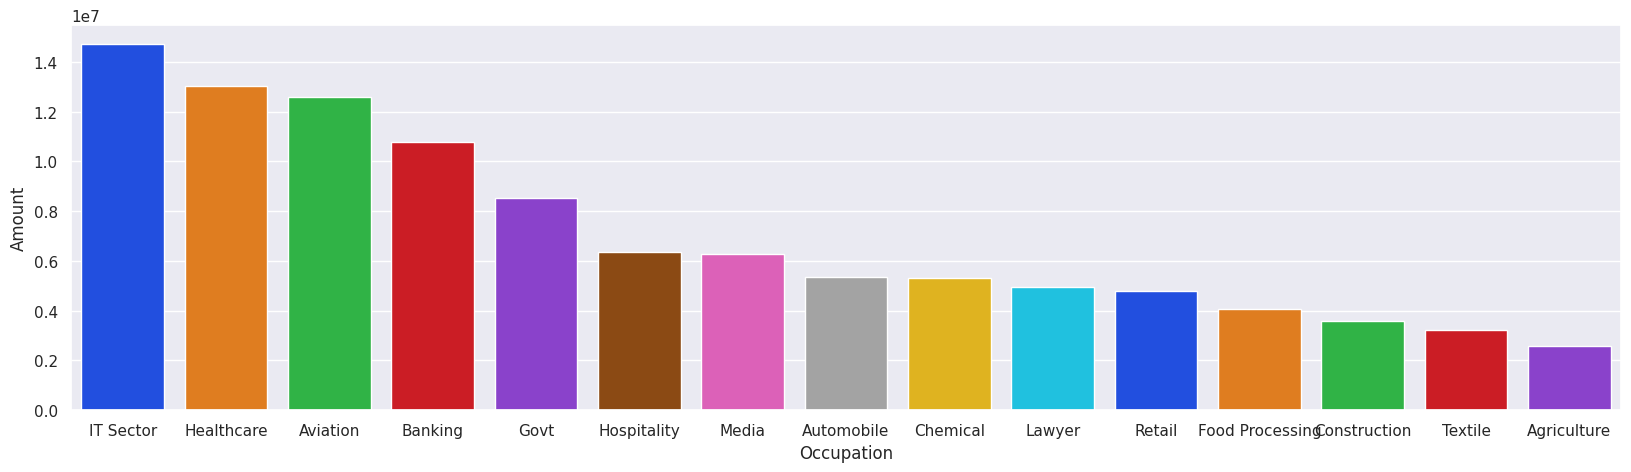

In [198]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount', palette = 'bright')

# Product category

<ipython-input-200-6d7128f0f1e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Product_Category',palette = 'bright')


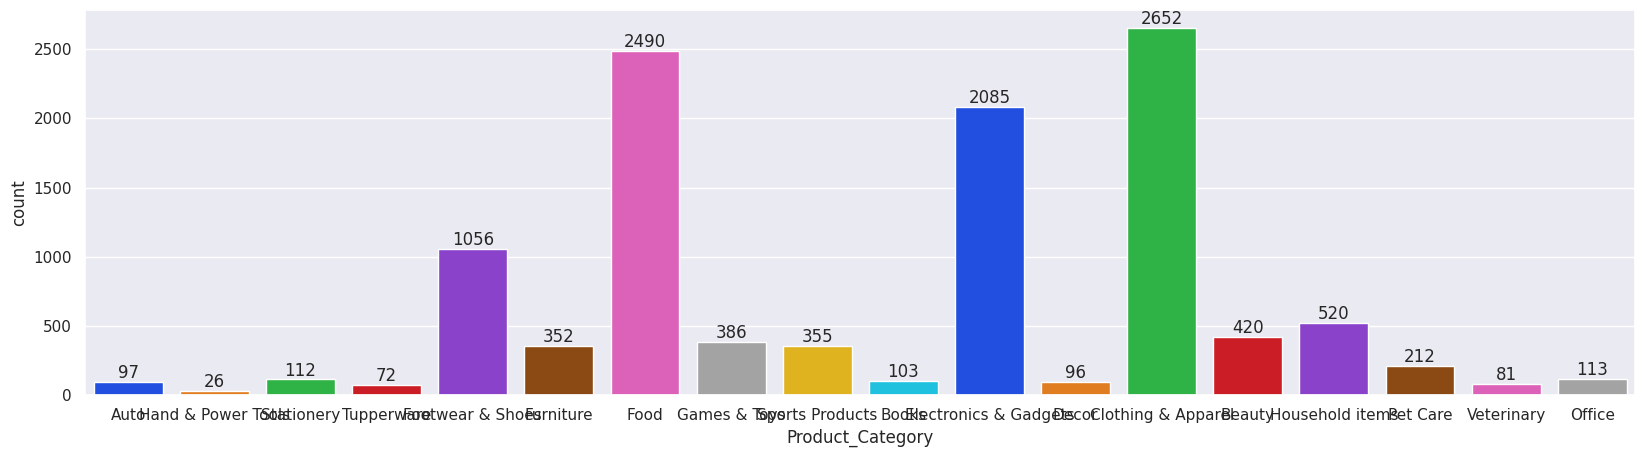

In [200]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category',palette = 'bright')

for bars in ax.containers:
    ax.bar_label(bars)

<ipython-input-201-95414969e0eb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount', palette = 'bright')


<Axes: xlabel='Product_Category', ylabel='Amount'>

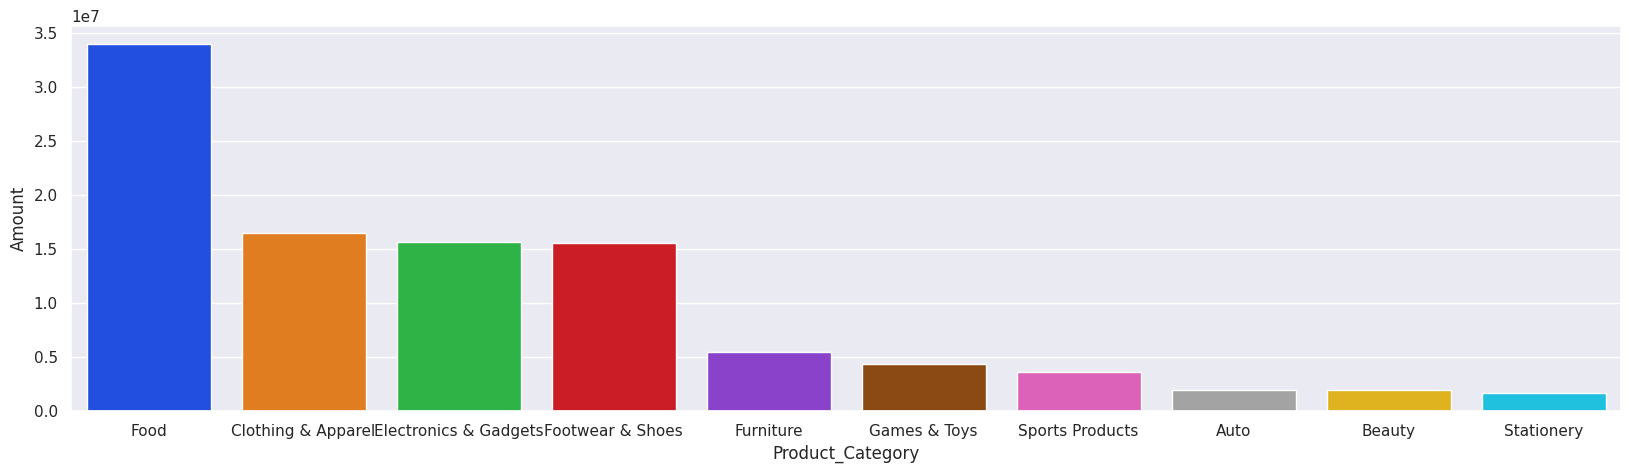

In [201]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount', palette = 'bright')

# Product id

<ipython-input-203-19b246d4f233>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', palette = 'bright')


<Axes: xlabel='Product_ID', ylabel='Orders'>

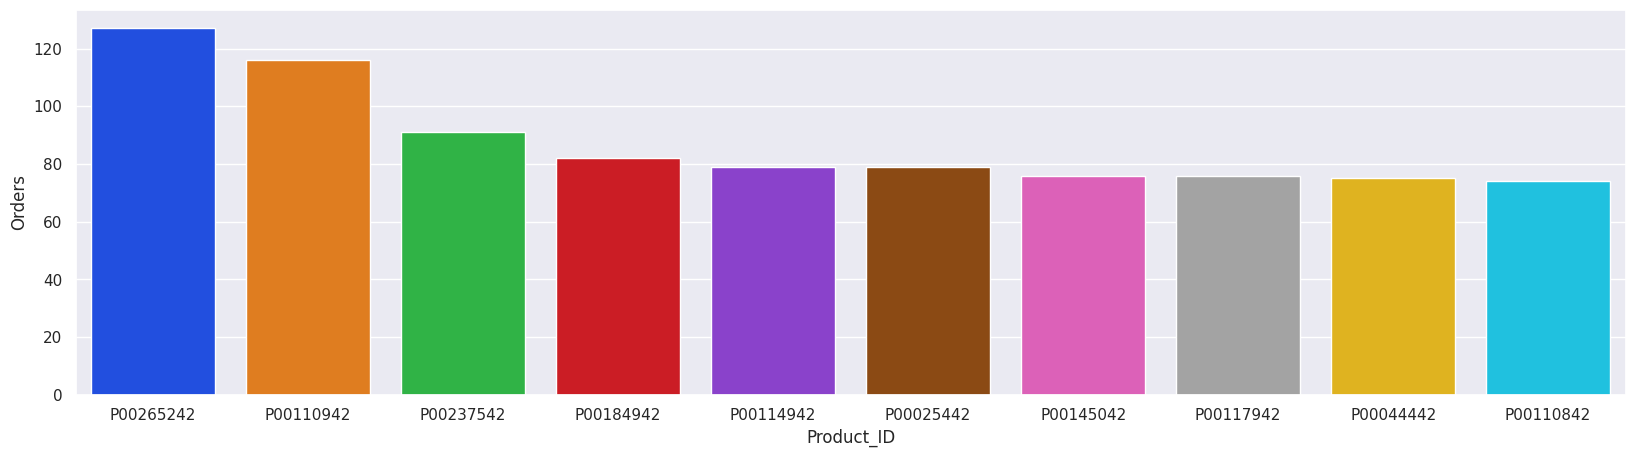

In [203]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', palette = 'bright')

## Conclusion:
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category

In [205]:
#Thanks